In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk. stem import WordNetLemmatizer 
from wordcloud import WordCloud

%matplotlib inline

In [97]:
df = pd.read_csv('fake.csv')
df.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


In [98]:
df.shape

(12999, 20)

In [99]:
df.isnull().sum()

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

In [100]:
df['title'].fillna("", inplace=True)
df['author'].value_counts().head(10)

admin                                    247
Editor                                   100
Eddy Lavine                              100
Starkman                                 100
Pakalert                                 100
Gillian                                  100
Alex Ansary                              100
Dave Hodges                               99
noreply@blogger.com (Alexander Light)     99
BareNakedIslam                            99
Name: author, dtype: int64

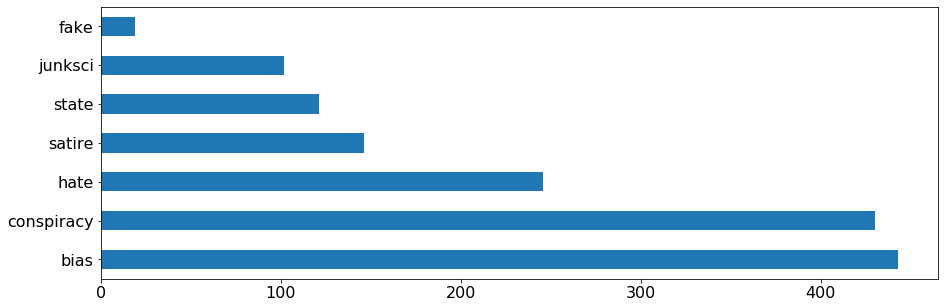

In [101]:
plt.figure(figsize=(15,5))
df[df['type'] != 'bs']['type'].value_counts().plot(kind="barh")

Text(0.5, 1.0, 'Country Wise News Article')

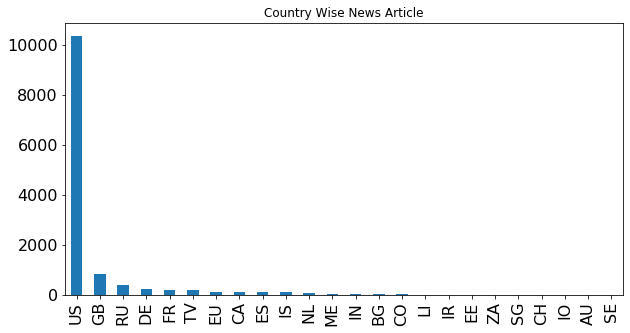

In [107]:
plt.figure(figsize=(10,5))
df['country'].dropna().value_counts().plot(kind="bar")
plt.title("Country Wise News Article")

In [7]:
df.dropna(subset=['text'], axis=0, inplace=True)
df.drop(['author','country','domain_rank','main_img_url','thread_title','ord_in_thread'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

uuid                  0
published             0
title                 0
text                  0
language              0
crawled               0
site_url              0
spam_score            0
replies_count         0
participants_count    0
likes                 0
comments              0
shares                0
type                  0
dtype: int64

In [8]:
df.shape

(12953, 14)

In [9]:
df.head(2)

,uuid,published,title,text,language,crawled,site_url,spam_score,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,0.0,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,0.0,0,1,0,0,0,bias


In [11]:
ps = WordNetLemmatizer()

### News Content Analysis

In [12]:
# data cleaning for text column
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i]) # removing sepcial characters and numbers
    review = review.lower() # lowering the text
    review = review.split() 
    # removing stopwords
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english')) and (len(word) > 4)] 
    review = ' '.join(review)
    corpus.append(review)

In [13]:
all_words = []
for text in corpus:
    all_words.append(text.split())
    
words = [j for i in all_words for j in i]

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist.most_common(20))

[('trump', 25628), ('clinton', 25220), ('people', 20815), ('state', 19058), ('would', 18106), ('hillary', 15879), ('american', 13326), ('election', 12448), ('world', 11445), ('government', 11102), ('president', 11008), ('right', 9637), ('obama', 9584), ('country', 9482), ('could', 9260), ('email', 8984), ('medium', 8552), ('russia', 8437), ('year', 8114), ('campaign', 7920)]


<BarContainer object of 15 artists>

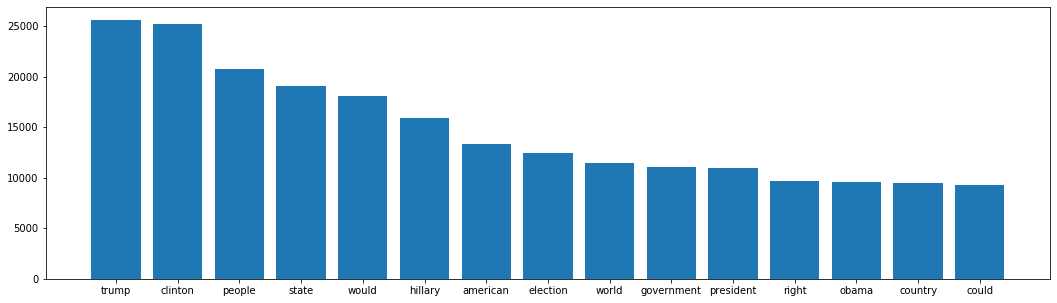

In [14]:
plt.figure(figsize=(18,5))
plt.bar(*zip(*fdist.most_common(15)))

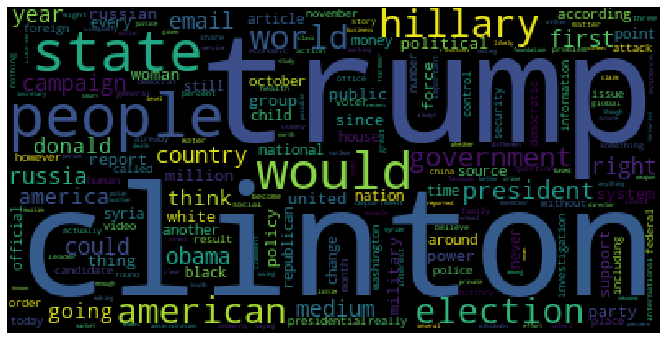

In [17]:
plt.figure(figsize=(15,6))
wordcloud = WordCloud().generate_from_frequencies(fdist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### News Title Analysis

In [18]:
# data cleaning for title column
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.lemmatize(word) for word in review if not word in set(stopwords.words('english')) and len(word) > 4]
    review = ' '.join(review)
    corpus.append(review)

all_words = []
for text in corpus:
    all_words.append(text.split())
    
words = [j for i in all_words for j in i]

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist.most_common(20))

[('trump', 1807), ('hillary', 1286), ('clinton', 1205), ('election', 700), ('video', 496), ('russia', 427), ('email', 399), ('comment', 396), ('america', 378), ('obama', 367), ('world', 347), ('donald', 320), ('american', 292), ('state', 247), ('wikileaks', 225), ('campaign', 220), ('breaking', 219), ('russian', 217), ('president', 213), ('medium', 201)]


<BarContainer object of 10 artists>

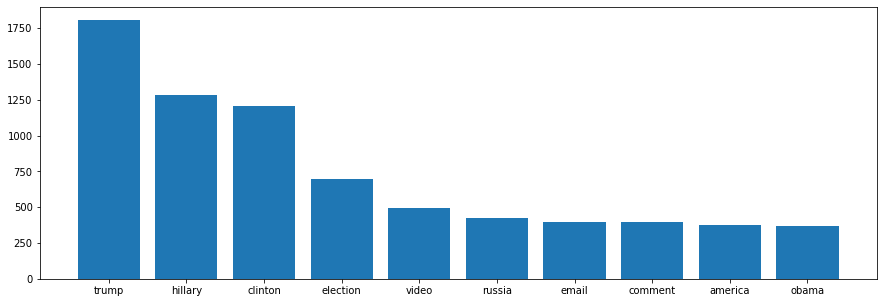

In [19]:
# with word length > 4
plt.figure(figsize=(15,5))
plt.bar(*zip(*fdist.most_common(10)))

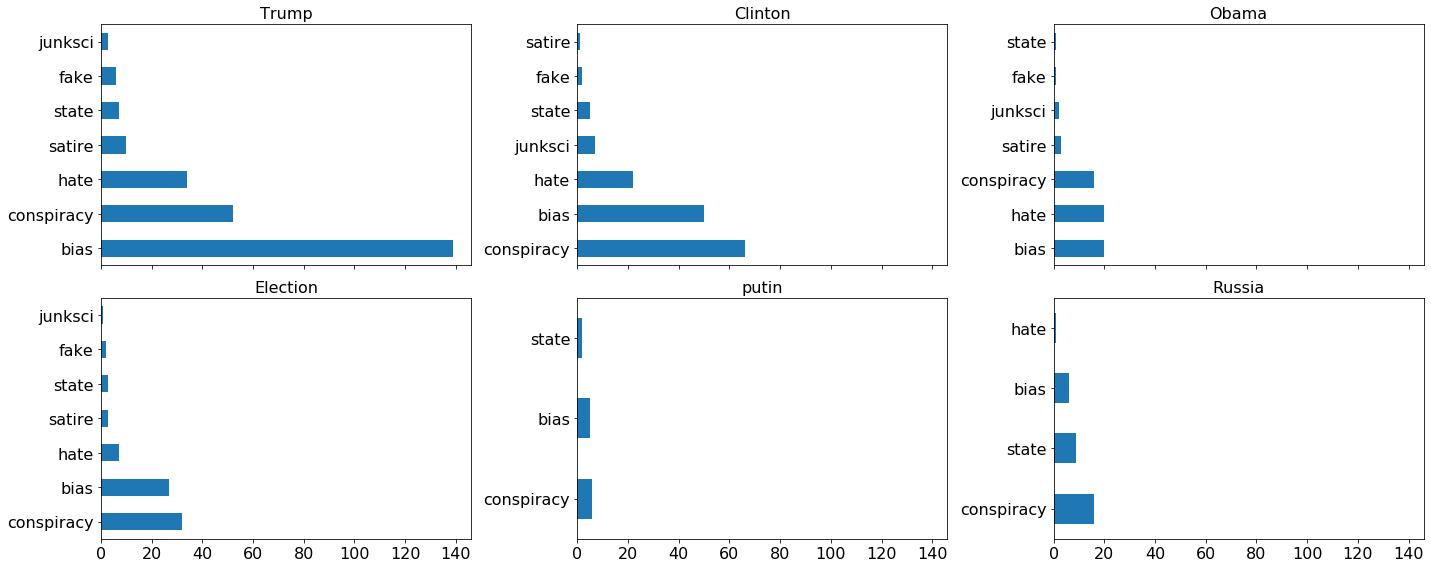

In [22]:
# plt.fontsize = 22

label = ['Trump|trump','Clinton|clinton', 'Obama|obama', 'Election|election', 'putin|Putin', 'Russia|russia']
fig, axes = plt.subplots(2,3, figsize=(20,8), sharex=True,)

for i, cat in enumerate(label):   
    ax = axes[i // 3][i % 3]
    df[df['title'].str.contains(cat) & (df['type'] != 'bs')]['type'].value_counts().plot(kind='barh', rot=0, ax=ax, fontsize=16)
    ax.set_title(cat.split('|')[0], fontsize=16)

fig.tight_layout()
plt.show()

In [ ]:
bigram = []
n = 2
for paragraph in corpus:
    for i in range(len(paragraph)-1,n):
        bigram.append(paragraph[i]:paragraph[i+n])

In [95]:
# bigram model for title
def n_grams(words):
    ngrams = {}
    # words = 2
    ngram = []
    for paragraph in corpus:
        words_tokens = nltk.word_tokenize(paragraph)
        for i in range(len(words_tokens)-words):
            seq = ' '.join(words_tokens[i:i+words])
            ngram.append(seq)
            if  seq not in ngrams.keys():
                ngrams[seq] = []
            ngrams[seq].append(words_tokens[i+words])
    
    return ngram
    
bigram = n_grams(2)
fdist = FreqDist(bigram)
print(fdist.most_common(20))

[('hillary clinton', 376), ('donald trump', 267), ('onion america', 99), ('america finest', 99), ('clinton campaign', 73), ('clinton email', 66), ('trump supporter', 58), ('dakota access', 52), ('clinton foundation', 49), ('voting machine', 45), ('white house', 41), ('hillary email', 40), ('voter fraud', 35), ('hillary campaign', 32), ('george soros', 31), ('trump hillary', 29), ('united state', 29), ('access pipeline', 28), ('megyn kelly', 28), ('saudi arabia', 27)]


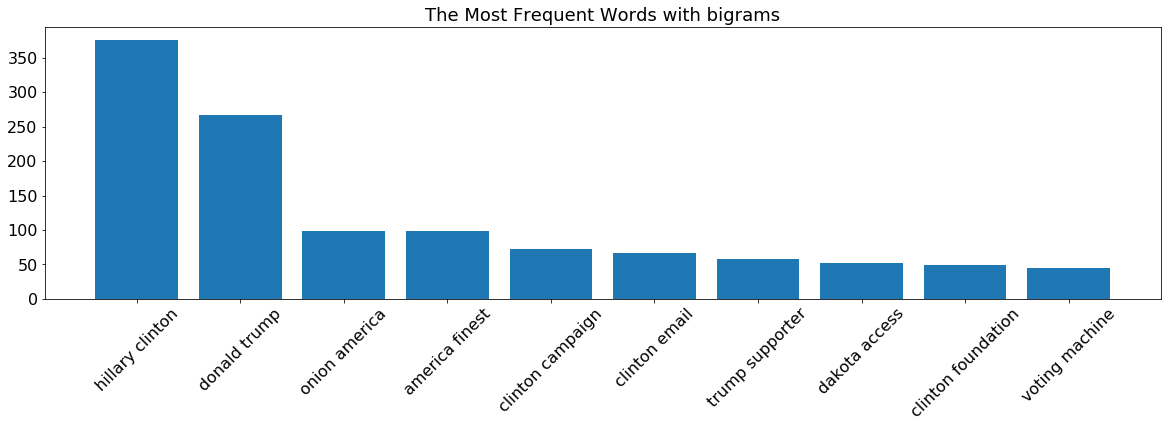

In [96]:
plt.figure(figsize=(20,5))
plt.bar(*zip(*fdist.most_common(10)))
plt.title('The Most Frequent Words with bigrams', fontsize=18)
plt.xticks(rotation=45);

In [55]:
# trigram model with
bigram = n_grams(3)
fdist = FreqDist(bigram)
print(fdist.most_common(20))

[('onion america finest', 99), ('dakota access pipeline', 28), ('syrian report november', 19), ('november daily contrarian', 18), ('president elect trump', 14), ('hillary clinton email', 14), ('black life matter', 14), ('katehon think geopolitics', 13), ('trump loses grabbing', 11), ('donald trump hillary', 11), ('ready civil unrest', 11), ('american concerned election', 11), ('clinton email investigation', 11), ('clinton crime family', 11), ('hillary clinton campaign', 10), ('trump hillary clinton', 10), ('civil unrest survey', 10), ('unrest survey find', 10), ('survey find american', 10), ('find american concerned', 10)]


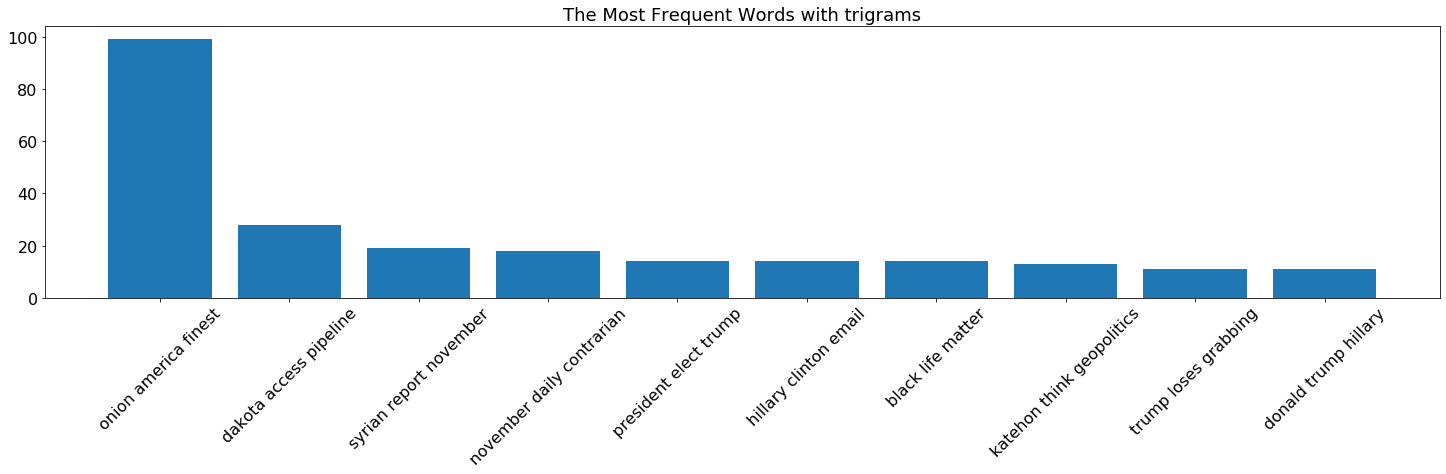

In [93]:
plt.figure(figsize=(25,5))
plt.bar(*zip(*fdist.most_common(10)))
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xticks(rotation=45);
plt.title('The Most Frequent Words with trigrams', fontsize=18);

In [58]:
df['site_url'] = df['site_url'].apply(lambda x:x.split(".")[0])

Text(0.5, 1.0, 'Publications')

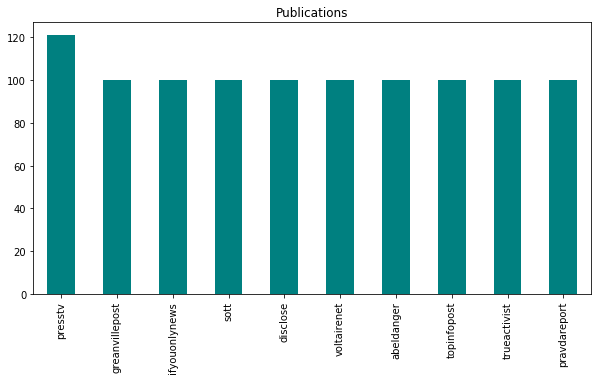

In [64]:
plt.figure(figsize=(10,5))
df['site_url'].value_counts().head(10).plot(kind="bar", color="teal")
plt.title('Publications')